#1.Loading the data

##1.1 Setting environment

In [ ]:
import librosa
import numpy as np
import matplotlib.pyplot as plt
import glob
import torch
import sklearn

from google.colab import drive
drive.mount('/content/drive')
# %cd "/content/drive/MyDrive/Project_learning/Music_classifier"
%cd "/content/drive/MyDrive/Music_classifier"
%ls

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
/content/drive/.shortcut-targets-by-id/1kLEM_aRHqYQ9cJ4IhUyAXLjQ5EzJDtN8/Music_classifier
'12 28 结论分享.gdoc'   chroma_stft.npy     Music_recognition.ipynb     version1.pth
 AI.7z                  database/          'Project Schedule.gdoc'      version2_2kc.pth
 Audios_2kc.npy         database.zip        runs/                       version2.pth
 Audios.npy             mfccs_norm.npy     'Technical communication'/   version2_sr.pth
 Audios_sr.npy          mfccs.npy          'Updated Versions'/
 chroma_stft_norm.npy   model_weights.pth  'Version 1'


In [ ]:
# Loading the graphs
audios=np.empty(78,dtype=object)
audios=np.load('Audios_sr.npy',allow_pickle=True)

## 1.2(optional) loading musics

In [ ]:
#1. Define required list
audios=np.empty(78,dtype=object)
file_names=[]

#2. Get all the file names: ex. 'database/03007.mp3'
file_names=glob.glob('database/*.mp3')
file_names=sorted(file_names) #确保每次读写的map3顺序都一致
print(len(file_names))
print(file_names)


78
['database/03001.mp3', 'database/03002.mp3', 'database/03003.mp3', 'database/03004.mp3', 'database/03005.mp3', 'database/03006.mp3', 'database/03007.mp3', 'database/03008.mp3', 'database/03009.mp3', 'database/03010.mp3', 'database/03011.mp3', 'database/04001.mp3', 'database/04002.mp3', 'database/04003.mp3', 'database/04004.mp3', 'database/04005.mp3', 'database/04006.mp3', 'database/04007.mp3', 'database/04008.mp3', 'database/04009.mp3', 'database/04010.mp3', 'database/04011.mp3', 'database/05001.mp3', 'database/05002.mp3', 'database/05003.mp3', 'database/05004.mp3', 'database/05005.mp3', 'database/05006.mp3', 'database/05007.mp3', 'database/05008.mp3', 'database/05009.mp3', 'database/05010.mp3', 'database/05011.mp3', 'database/05012.mp3', 'database/05013.mp3', 'database/05014.mp3', 'database/05015.mp3', 'database/05016.mp3', 'database/05017.mp3', 'database/05018.mp3', 'database/05019.mp3', 'database/05020.mp3', 'database/05021.mp3', 'database/05022.mp3', 'database/05023.mp3', 'datab

In [ ]:
print(audios[5].shape)

(128, 20723)


In [ ]:
#3. create_spectrogram,which return a normalized graph
def create_spectrogram(audio,sr):
    # Convert audio to spectrogram
    spectrogram = librosa.feature.melspectrogram(y=audio, sr=sr, n_mels=128)
    spectrogram_db = librosa.power_to_db(spectrogram, ref=np.max)
    return spectrogram_db

#4. Adding all the graphs into the list
for i in range(len(file_names)):
  audio,sr = librosa.load(file_names[i],sr=None,mono=True)  # Shape (height, width)
  audio=create_spectrogram(audio,sr)
  # print(audio.shape,file_names[i])
  audios[i]=audio
  if (i+1)%5==0 or i+1==78:
    print("Loaded %d/78 "%(i+1))
#5. Save the object array
np.save('Audios_sr.npy',audios)

Loaded 5/78 
Loaded 10/78 
Loaded 15/78 
Loaded 20/78 
Loaded 25/78 
Loaded 30/78 
Loaded 35/78 
Loaded 40/78 
Loaded 45/78 
Loaded 50/78 
Loaded 55/78 
Loaded 60/78 
Loaded 65/78 
Loaded 70/78 
Loaded 75/78 
Loaded 78/78 


## 1.3 Feature Extraction

### 1.3.0 Load Audios

In [ ]:
load_audios = np.empty(78,dtype=object)

for i in range(len(load_audios)):
  audio,sr = librosa.load(file_names[i],sr=sr,mono=True)
  load_audios[i] = audio
print(load_audios.shape)

(78,)


### 1.3.1 MFCC

/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_data.py:258: UserWarning: Numerical issues were encountered when centering the data and might not be solved. Dataset may contain too large values. You may need to prescale your features.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_data.py:277: UserWarning: Numerical issues were encountered when scaling the data and might not be solved. The standard deviation of the data is probably very close to 0. 
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_data.py:258: UserWarning: Numerical issues were encountered when centering the data and might not be solved. Dataset may contain too large values. You may need to prescale your features.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_data.py:277: UserWarning: Numerical issues were encountered when scaling the data and might not be solved. The standard deviation of the data is probab

(78,) (78,)


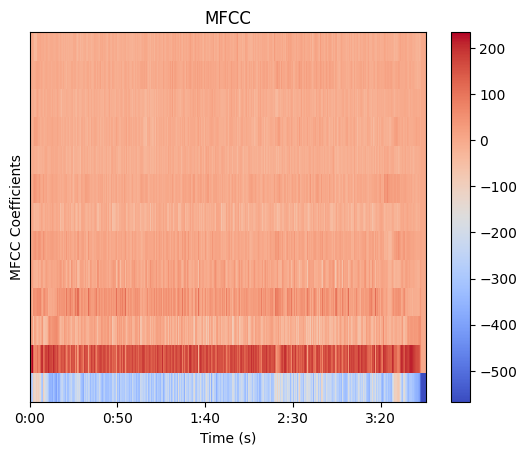

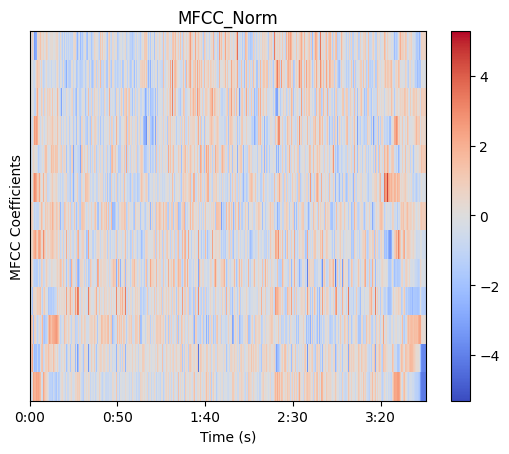

In [ ]:
mfccs = np.empty(78,dtype=object)
mfccs_norm = np.empty(78,dtype=object)
for i in range(len(file_names)):
  mfcc = librosa.feature.mfcc(y=load_audios[i], sr=sr, n_mfcc=13)
  mfcc_norm = sklearn.preprocessing.scale(mfcc, axis=1) # normalized
  mfccs[i]=mfcc
  mfccs_norm[i]=mfcc_norm
print(mfccs.shape,mfccs_norm.shape)
#np.save('mfcc.npy',mfccs)
librosa.display.specshow(mfccs[0], sr=sr, x_axis='time')
plt.colorbar()
plt.title('MFCC')
plt.xlabel('Time (s)')
plt.ylabel('MFCC Coefficients')
plt.show()

librosa.display.specshow(mfccs_norm[0], sr=sr, x_axis='time')
plt.colorbar()
plt.title('MFCC_Norm')
plt.xlabel('Time (s)')
plt.ylabel('MFCC Coefficients')
plt.show()

In [ ]:
np.save('mfccs.npy',mfccs)
np.save('mfccs_norm.npy',mfccs_norm)

### 1.3.2 Chroma Features

In [ ]:
chroma_stft = np.empty(78,dtype=object)
chroma_stft_norm = np.empty(78,dtype=object)
hop_length = 512
for i in range(len(file_names)):
  chroma = librosa.feature.chroma_stft(y=load_audios[i], sr=sr, hop_length=hop_length)
  chroma_norm = sklearn.preprocessing.scale(chroma, axis=1) # normalized
  chroma_stft[i]=chroma
  chroma_stft_norm[i]=chroma_norm
print(chroma_stft.shape,chroma_stft_norm.shape)

/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_data.py:258: UserWarning: Numerical issues were encountered when centering the data and might not be solved. Dataset may contain too large values. You may need to prescale your features.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_data.py:277: UserWarning: Numerical issues were encountered when scaling the data and might not be solved. The standard deviation of the data is probably very close to 0. 
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_data.py:258: UserWarning: Numerical issues were encountered when centering the data and might not be solved. Dataset may contain too large values. You may need to prescale your features.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_data.py:277: UserWarning: Numerical issues were encountered when scaling the data and might not be solved. The standard deviation of the data is probab

(78,) (78,)


/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_data.py:258: UserWarning: Numerical issues were encountered when centering the data and might not be solved. Dataset may contain too large values. You may need to prescale your features.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_data.py:277: UserWarning: Numerical issues were encountered when scaling the data and might not be solved. The standard deviation of the data is probably very close to 0. 
  warnings.warn(


<Figure size 1500x500 with 0 Axes>

<Figure size 1500x500 with 0 Axes>

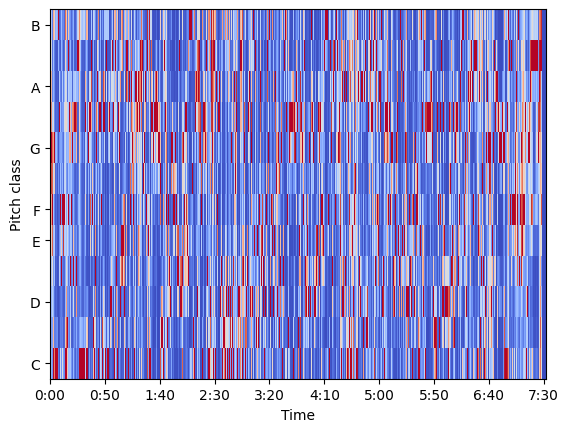

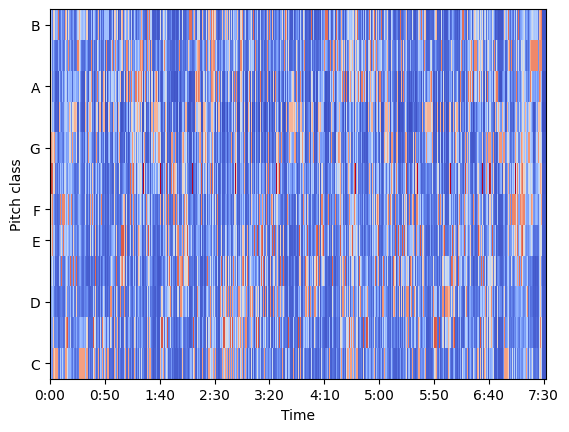

In [ ]:
plt.figure(figsize=(15, 5))
librosa.display.specshow(chroma_stft[0], x_axis='time', y_axis='chroma', hop_length=hop_length, cmap='coolwarm')
plt.show()
librosa.display.specshow(chroma_stft_norm[0], x_axis='time', y_axis='chroma', hop_length=hop_length, cmap='coolwarm')

In [ ]:
np.save('chroma_stft.npy',chroma_stft)
np.save('chroma_stft_norm.npy',chroma_stft_norm)

In [ ]:
audios=np.load('mfccs_norm.npy',allow_pickle=True)
print(audios.shape)

(78,)


##1.4 Transforming all MP3 to Tensor

In [ ]:
# Transforming the music graphs to Tensors
for i in range(len(audios)):
  audios[i]=torch.tensor(audios[i],dtype=torch.float32)
  #print(i,audios[i].shape)

<ipython-input-41-c6fdcd31cc2c>:3: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  audios[i]=torch.tensor(audios[i],dtype=torch.float32)


#2.Preparing training data

In [ ]:
import random
#1.Get a random subgraph from a given graph:(20s)
# 1600=32*50

def getSample():
  label=random.randint(0,77)#(randomint 包含上下界)
  graph=audios[label]
  start_i=random.randint(0,graph.size(1)-1600)
  sample=torch.zeros([128,1600],dtype=torch.float32)

  sample.copy_(graph[:,start_i:(start_i+1600)])
  # print(sample.shape)
  sample=torch.unsqueeze(sample,0)
  # print(sample.shape)
  #sample=torch.mean(sample.reshape(sample.shape[0],sample.shape[1],-1,50),dim=3)
  #print(sample.shape)
  sample=sample[:,:,::50]
  return sample,label

def getBatchSample(batch_size):
  batch_data=[]
  batch_labels=[]
  for i in range(batch_size):
    data,label=getSample()
    batch_data.append(data)
    batch_labels.append(label)
  batch_data=torch.stack(batch_data)
  batch_labels=torch.tensor(batch_labels)
  return batch_data,batch_labels

In [ ]:
x,label=getSample()
print(x.shape)

torch.Size([1, 13, 32])


#3.Building the model

In [ ]:
import torch.nn as nn
import torch.nn.functional as F

class CNNModel(nn.Module):
    def __init__(self, num_classes):
        super(CNNModel, self).__init__()
        self.conv1 = nn.Conv2d(1, 32, kernel_size=(3, 3), stride=1, padding=1)
        self.pool1 = nn.AvgPool2d(kernel_size=(4, 2))
        self.pool2 = nn.AvgPool2d(kernel_size=(2, 4))
        self.conv2 = nn.Conv2d(32, 64, kernel_size=(3, 3), stride=1, padding=1)
        self.conv3 = nn.Conv2d(64, 128, kernel_size=(3, 3), stride=1, padding=1)
        self.conv4 = nn.Conv2d(128, 64, kernel_size=(3, 3), stride=1, padding=1)
        self.conv5 = nn.Conv2d(64, 32, kernel_size=(3, 3), stride=1, padding=1)
        self.conv6 = nn.Conv2d(64, 8, kernel_size=(3, 3), stride=1, padding=1)
        # Adaptive pooling to ensure output size is fixed
        # self.adaptive_pool = nn.AdaptiveAvgPool2d((4,50)) #决定最后两个维度

        self.fc1 = nn.Linear(512,256)
        self.fc2 = nn.Linear(256,128)
        self.fc3 = nn.Linear(128, num_classes)
        self.softmax=nn.LogSoftmax(dim=1)

    def forward(self, x):
        # input_shape: Batch,1,128,32
        x = F.relu(self.conv1(x)) # conv_out 32 128 32
        x = self.pool1(F.relu(self.conv2(x))) # conv_out 64 128 32 --- pool: 64 32 16
        x = F.relu(self.conv3(x)) # conv_out 128 32 16
        x = self.pool1(F.relu(self.conv4(x))) # conv_out 64 32 16 --- pool:64 8 8
        x = F.relu(self.conv6(x)) # conv_out 8 8 8

        # Flatten the tensor
        x = x.view(x.size(0),-1) # flatten: batch_size,512
        x = F.relu(self.fc1(x)) # fc1: 256
        x = F.relu(self.fc2(x)) # fc2L 128
        x = F.relu(self.fc3(x)) # batch_size,num_classes
        x = self.softmax(x)
        return x

#4.Training the model

In [ ]:
# Hyperparameters
num_classes = 78
num_epochs = 2000
learning_rate = 0.0001
batch_size = 20

# Preparing model
model = CNNModel(num_classes)
# model.load_state_dict(torch.load('version2.pth',weights_only=True))

In [ ]:
# Preparing TensorBoard
from torch.utils.tensorboard import SummaryWriter
# Create a SummaryWriter instance
writer = SummaryWriter()

In [ ]:
# Initialize the model, loss function, and optimizer
criterion = nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(model.parameters(), lr=learning_rate)
# print(model)
# Training loop
for epoch in range(num_epochs):
    accuracy=[]
    X_train, y_train = getBatchSample(batch_size)
    train_dataset = torch.utils.data.TensorDataset(X_train, y_train)
    train_loader = torch.utils.data.DataLoader(train_dataset, batch_size=batch_size, shuffle=True)
    for inputs, labels in train_loader:
        optimizer.zero_grad()  # Clear gradients
        outputs = model(inputs)  # Forward pass
        _,pred=outputs.max(dim=1)
        # output size=batchsize, training is done in batches
        accuracy.append((torch.sum((pred==labels),0).item())/batch_size)
        loss = criterion(outputs, labels)  # Compute loss
        writer.add_scalar("Loss/train", loss, epoch)
        loss.backward()  # Backward pass
        optimizer.step()  # Update weights
    avg_accuracy=sum(accuracy)/len(accuracy)
    print(f'Epoch [{epoch + 1}/{num_epochs}], Loss: {loss.item():.4f}, Accuracy: {avg_accuracy*100:.4f}%')
%load_ext tensorboard
%tensorboard --logdir=runs

RuntimeError: Given input size: (64x3x16). Calculated output size: (64x0x8). Output size is too small

In [ ]:
torch.save(model.state_dict(),'version2_sr.pth')

#5.Evaluating the model

In [ ]:
X_test, y_test = getBatchSample(batch_size*100)
test_dataset = torch.utils.data.TensorDataset(X_test, y_test)
test_loader = torch.utils.data.DataLoader(test_dataset, batch_size=batch_size, shuffle=True)
accuracy=[]
for inputs, labels in test_loader:
    # print(inputs.size())
    outputs = model(inputs)  # Forward pass
    _,pred=outputs.max(dim=1)
    # output size=batchsize, training is done in batches
    accuracy.append((torch.sum((pred==labels),0).item())/batch_size)
    # print(accuracy)
avg_accuracy=sum(accuracy)/len(accuracy)
print(f'Accuracy: {avg_accuracy*100:.4f}%')

Accuracy: 38.6000%
